In [3]:
# Nama : JIRYAN FAROKHI
# Email : jiryanfarokhi@gmail.com
# Domisili : Surabaya

In [4]:
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from tensorflow.keras.initializers import he_normal
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam
#PreTrained Model VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
#Image Generator DataAugmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
import zipfile
import pathlib
# import splitfolders

In [6]:
!chmod 600 /content/kaggle.json

In [7]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 87% 41.0M/47.0M [00:00<00:00, 68.7MB/s]
100% 47.0M/47.0M [00:00<00:00, 72.9MB/s]


In [8]:
zip_file = zipfile.ZipFile('/content/shoe-vs-sandal-vs-boot-dataset-15k-images.zip', 'r')
zip_file.extractall('/tmp')
zip_file.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
dir = "/tmp/Shoe_vs_Sandal_vs_Boot_Dataset"

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 25,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.2
)

In [11]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    dir,
    target_size = (128,128),
    shuffle = True,
    subset = 'training',
    batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
    dir,
    target_size= (128,128),
    subset = 'validation',
    batch_size = 32
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [13]:
model_2 = Sequential(name="jiryan_CNN")

model_2.add(Conv2D(64, kernel_size=(3,3), padding ='same', activation ='relu', kernel_initializer=he_normal(), input_shape = (128,128, 3), name ='CONV_Layer1'))
model_2.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation ='relu', kernel_initializer= he_normal(), name = 'CONV_Layer2'))
model_2.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0, 40))

model_2.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = he_normal(), name = 'CONV_Layer3'))
model_2.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model_2.add(BatchNormalization())

model_2.add(Dropout(0,40))

model_2.add(Flatten(name = 'Flatten'))

model_2.add(Dense(220, activation = 'relu', kernel_initializer = he_normal(), name = 'FullyConnected1'))
model_2.add(Dense(64, activation = 'relu'))

model_2.add(Dense(3, activation = 'softmax', kernel_initializer = he_normal(), name = 'OutputLayer'))

model_2.summary()

Model: "jiryan_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CONV_Layer1 (Conv2D)        (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 CONV_Layer2 (Conv2D)        (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                        

In [14]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
early_stopping_callback = EarlyStopping(min_delta = 0.001, patience=5, restore_best_weights=True, monitor='val_loss')

In [16]:
history = model_2.fit(
    train_generator,
    steps_per_epoch=33,
    epochs=50,
    validation_steps=5,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/50
33/33 [==============================] - 55s 2s/step - loss: 0.9117 - accuracy: 0.6392 - val_loss: 2.7500 - val_accuracy: 0.3750
Epoch 2/50
33/33 [==============================] - 52s 2s/step - loss: 0.5282 - accuracy: 0.7907 - val_loss: 1.5970 - val_accuracy: 0.4125
Epoch 3/50
33/33 [==============================] - 52s 2s/step - loss: 0.3856 - accuracy: 0.8532 - val_loss: 0.6662 - val_accuracy: 0.7063
Epoch 4/50
33/33 [==============================] - 52s 2s/step - loss: 0.3702 - accuracy: 0.8551 - val_loss: 0.6319 - val_accuracy: 0.7188
Epoch 5/50
33/33 [==============================] - 51s 2s/step - loss: 0.3923 - accuracy: 0.8693 - val_loss: 0.5174 - val_accuracy: 0.7812
Epoch 6/50
33/33 [==============================] - 52s 2s/step - loss: 0.3054 - accuracy: 0.8930 - val_loss: 0.3800 - val_accuracy: 0.8438
Epoch 7/50
33/33 [==============================] - 51s 2s/step - loss: 0.2592 - accuracy: 0.8987 - val_loss: 0.2331 - val_accuracy: 0.9250
Epoch 8/50
33/33 [==

In [17]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model_2, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

7392708

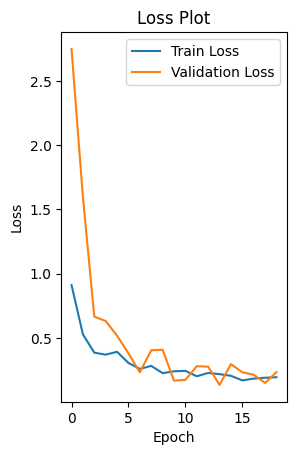

In [18]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

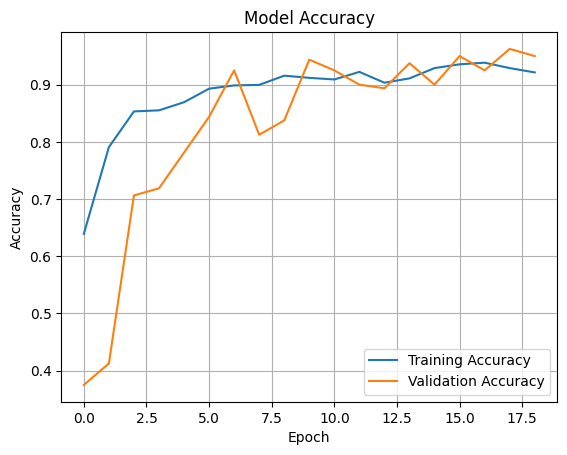

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()